# libraries

In [ ]:
!pip install Sastrawi
!pip install contractions

     |████████████████████████████████| 209 kB 12.0 MB/s 
     |████████████████████████████████| 284 kB 13.2 MB/s 
     |████████████████████████████████| 321 kB 47.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=95b7ee76086a0070667ad4acd4ea2e859e0253aba97ab0b9b5da5bc61086b5b5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [ ]:
import xlrd

# preprocessing func

In [ ]:
#removes html
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()
  
#remove between square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#eliminates contractions
def replace_contractions(text):
  """Replace contactions in string of text"""
  return contractions.fix(text)

#denoise text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = replace_contractions(text)
  return text

In [ ]:
factoryStopword = StopWordRemoverFactory()
stopword = factoryStopword.create_stop_word_remover()
stop_factory = StopWordRemoverFactory().get_stop_words()

def get_stopwords():
  docs = pd.read_csv('/content/stopwords-id.txt', header = None, names= ['stopword'])
  docs = docs['stopword'].tolist()
  return docs

stop_words = get_stopwords()

# Merge stopword
data = set(stop_factory + stop_words)

#remove stopword
def removeStopword(str):
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in data]
    return ' '.join(filtered_sentence)

In [ ]:
#cleaning dataset
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    str = re.sub("b'|b\"",'',str)
    #remove username inside brackets
    str = re.sub('SENSITIVE-NO',' ',str) 
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    return str

In [ ]:
#remove twitter symbols
def remove_symbols(str):
  #remove RT
  str = re.sub ('RT', '', str)
  #remove @username
  str = re.sub('@[^\s]+', '', str)
  return str

In [ ]:
#normalization of words
normalisasi = pd.read_csv('kamus.csv', encoding = 'latin-1')
normalisasi_map = dict(zip(normalisasi['original'], normalisasi['replacement']))
def normalizing(text):
  return ' '.join([normalisasi_map[word] if word in normalisasi_map else word for word in text.split(' ')])

In [ ]:
factoryStemmer = StemmerFactory()
stemmer = factoryStemmer.create_stemmer()

def stemming(text):
  return stemmer.stem(text)

In [ ]:
#preprocessing dataset function
def preprocessing(str):
  str = remove_symbols(str)
  str = denoise_text(str)
  str = normalizing(str)
  str = cleaning(str)
  #str = stemming(str)
  str = normalizing(str)
  str = cleaning(str)
  return str

In [ ]:
print(preprocessing('Gelatine Sheet (Bronze) / Gelatine lembaran HALAL (PER 5 LEMBAR) <br><br> @sere_nity'))
print(preprocessing('polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews.com'))
print(preprocessing('Dokter Sebut Penanganan Rekonstruksi Bayi Dina Oktavia akan Dilakukan Sampai Usia 17 tahun - Halaman 4 - www.tribunnews.com'))
print(preprocessing('Misteri Kematian Hakim Jamaluddin Saat Akan Bercerai, Istri Sudah 7 Kali Diperiksa Polisi - www.voaindonesia.com'))
print(preprocessing('uuuu neo coffee (nctzen/neotizen comment beautiful grass 🤩)'))
print(preprocessing('mengsedih'))

gelatine sheet bronze gelatine lembaran halal per lembar
polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews com
dokter sebut penanganan rekonstruksi bayi dina oktavia akan dilakukan sampai usia tahun halaman
misteri kematian hakim jamaluddin saat akan bercerai istri sudah kali diperiksa polisi
uuuu neo coffee nctzen neotizen komen cantik grass
mengsedih


# modeling

In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk import tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.7.0
2.7.0


In [ ]:
#load data
df = pd.read_csv('/content/indihome.csv')
df

,text,unrelated,easy_pos,easy_neg,harder_pos,harder_neg,neither,label
0,bagi yang bermsalah dengan indihome bisa alter...,neu,NaN,NaN,NaN,NaN,NaN,neu
1,gwen spidermannowayhome radit meminta maaf ric...,neu,NaN,NaN,NaN,NaN,NaN,neu
2,memang indihome punya kepala,NaN,NaN,NaN,NaN,NaN,neu,neu
3,gara gara indihome eror pada saat tes iya iya ...,NaN,NaN,neg,NaN,NaN,NaN,neg
4,sebenarnya ini handphone laptop aku yang sudah...,NaN,NaN,neg,NaN,NaN,NaN,neg
...,...,...,...,...,...,...,...,...
5473,lirik yu jadwal bank rakyat indonesia liga nya,neu,NaN,NaN,NaN,NaN,NaN,neu
5474,naaah buat yang suka bola bank rakyat indonesi...,neu,NaN,NaN,NaN,NaN,NaN,neu
5475,jagoin siapa iya di bank rakyat indonesia liga...,neu,NaN,NaN,NaN,NaN,NaN,neu
5476,internet indihome saya tidak fungsi tiba tiba ...,NaN,NaN,neg,NaN,NaN,NaN,neg


In [ ]:
#apply preprocessing
df['text'] = df['text'].apply(preprocessing)

In [ ]:
# saving preprocessed file
df.to_csv('indihome-preprocessed.csv', sep = ',', encoding = 'utf-8', index = False)

In [ ]:
# delete unused column
df = df.drop(columns = ['unrelated', 'easy_pos', 'easy_neg', 'harder_pos', 'harder_neg', 'neither'])
df

,text,label
0,bagi yang bermsalah dengan indihome bisa alter...,neu
1,gwen spidermannowayhome radit meminta maaf ric...,neu
2,memang indihome punya kepala,neu
3,gara gara indihome eror pada saat tes iya iya ...,neg
4,sebenarnya ini handphone laptop aku yang sudah...,neg
...,...,...
5473,lirik yu jadwal bank rakyat indonesia liga nya,neu
5474,naaah buat yang suka bola bank rakyat indonesi...,neu
5475,jagoin siapa iya di bank rakyat indonesia liga...,neu
5476,internet indihome saya tidak fungsi tiba tiba ...,neg


In [ ]:
# delete nan columns
df = df.dropna()

In [ ]:
# delete other label which unused eg. both
index_names = df[df['label'] == 'both'].index
df = df.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,text,label
0,bagi yang bermsalah dengan indihome bisa alter...,neu
1,gwen spidermannowayhome radit meminta maaf ric...,neu
2,memang indihome punya kepala,neu
3,gara gara indihome eror pada saat tes iya iya ...,neg
4,sebenarnya ini handphone laptop aku yang sudah...,neg
...,...,...
5472,selamat hari anak seduniaa ayo ikan tonton yan...,neu
5473,lirik yu jadwal bank rakyat indonesia liga nya,neu
5474,naaah buat yang suka bola bank rakyat indonesi...,neu
5475,jagoin siapa iya di bank rakyat indonesia liga...,neu


In [ ]:
len(df)

2744

In [ ]:
# detecting duplicated
df.duplicated().sum()

16

In [ ]:
#delete duplicated data
df = df.drop_duplicates(subset = 'text', keep = 'last')
df.duplicated().sum()

0

In [ ]:
# reseting index after dropping nan and deletecing duplicated columns
df = df.reset_index(drop=True)
df

,text,label
0,bagi yang bermsalah dengan indihome bisa alter...,neu
1,gwen spidermannowayhome radit meminta maaf ric...,neu
2,memang indihome punya kepala,neu
3,gara gara indihome eror pada saat tes iya iya ...,neg
4,sebenarnya ini handphone laptop aku yang sudah...,neg
...,...,...
2719,selamat hari anak seduniaa ayo ikan tonton yan...,neu
2720,lirik yu jadwal bank rakyat indonesia liga nya,neu
2721,naaah buat yang suka bola bank rakyat indonesi...,neu
2722,jagoin siapa iya di bank rakyat indonesia liga...,neu


In [ ]:
#convert label string to categorical
df.dropna(inplace = True)
df['label_id'] = df['label'].factorize()[0]
kategori_id = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id.values)
id_to_kategori = dict(kategori_id[['label_id', 'label']].values)

#show data id_to_kategori
id_to_kategori

{0: 'neu', 1: 'neg', 2: 'pos'}

neg    1656
neu     615
pos     453
Name: label, dtype: int64

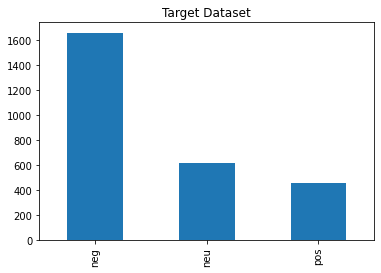

In [ ]:
#knowing dataset counts
target = df['label'].value_counts()
target.plot(kind='bar', title='Target Dataset')

#show dataset
target

In [ ]:
#balancing dataset
class_0, class_1, class_2= df['label_id'].value_counts()

class_0, class_1, class_2

(1656, 615, 453)

Random samping: 
pos    453
neu    453
neg    453
Name: label, dtype: int64
Total sentences:  1359


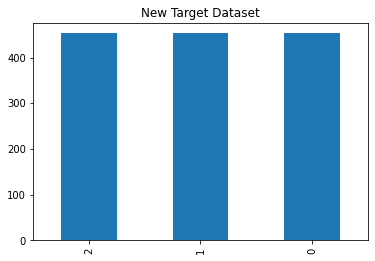

In [ ]:
dataset_class_0 = df[df['label_id'] == 0]
dataset_class_1 = df[df['label_id'] == 1]
dataset_class_2 = df[df['label_id'] == 2]


#making dataset as much as label 2
dataset_class_0 = dataset_class_0.sample(class_2)
dataset_class_1 = dataset_class_1.sample(class_2)
dataset_class_2 = dataset_class_2.sample(class_2)


df = pd.concat([dataset_class_0, dataset_class_1, dataset_class_2], axis=0)

print("Random samping: ")
print(df.label.value_counts())

df.label_id.value_counts().plot(kind='bar', title='New Target Dataset')
print('Total sentences: ', len(df))

In [ ]:
df

,text,label,label_id
2630,keren banget karena pekan ini ada tanding bank...,neu,0
199,cek direct message min,neu,0
515,coba pakai internya dari perusahaan listrik ne...,neu,0
1039,sila sampai keluh kesah,neu,0
146,barangkali kakak sudah langgan satu tahun iya,neu,0
...,...,...,...
1471,kayak seru banget di mandalika apalagi kata ny...,pos,2
1586,siapa yang belum menonton ayo kita bawa asa ba...,pos,2
2325,terima kasih iya aku wfhnya jadi lancar tidak ...,pos,2
1028,saya make indihome ganggu muluy iya saya kira ...,pos,2


In [ ]:
#checking dataset value
label = df['label_id'].values
text = df['text'].values

print('Value of [label_id]:', label, "\n")
print('Value of [text]:', text)

Value of [label_id]: [0 0 0 ... 2 2 2] 

Value of [text]: ['keren banget karena pekan ini ada tanding bank rakyat indonesia liga iya z'
 'cek direct message min'
 'coba pakai internya dari perusahaan listrik negara kak nama iconnect saya maka itu lancar banget waktu itu tawar pas tambah daya listrik eh nyata kata abang instalasi bisa aju instalsi via aplikasi perusahaan listrik negara di playstore'
 ...
 'terima kasih iya aku wfhnya jadi lancar tidak tahu deh kalau tidak ada indihome'
 'saya make indihome ganggu muluy iya saya kira lambat bayar tahu ganggu'
 'indihome monthly photo contest tema is coming bro tentu tema kali ini seru banget astreet photographya dan banyaka']


In [ ]:
label

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
#max features
maxfeatures = 20000

#tokenization
tokenizer = Tokenizer(num_words = maxfeatures)
tokenizer.fit_on_texts(text)

In [ ]:
#max sequential per word in NN
maxseqlen = max([len(i.split()) for i in text])
print(maxseqlen)

49


In [ ]:
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen = maxseqlen)
y = to_categorical(label, num_classes = 3)

print("Shape of data tensor ['text']:", X.shape)
print("Shape of data tensor ['label']:", y.shape)

Shape of data tensor ['text']: (1359, 49)
Shape of data tensor ['label']: (1359, 3)


In [ ]:
#tokening word index
idx_token = tokenizer.word_index
idx_token

{'indihome': 1,
 'iya': 2,
 'ini': 3,
 'di': 4,
 'tidak': 5,
 'yang': 6,
 'bisa': 7,
 'sudah': 8,
 'dan': 9,
 'saya': 10,
 'banget': 11,
 'ada': 12,
 'lagi': 13,
 'aktivitastanpabatas': 14,
 'saja': 15,
 'kamu': 16,
 'dari': 17,
 'mau': 18,
 'bayar': 19,
 'sama': 20,
 'internetnyaindonesia': 21,
 'pakai': 22,
 'ayo': 23,
 'indonesia': 24,
 'kenapa': 25,
 'sih': 26,
 'jadi': 27,
 'jaring': 28,
 'hari': 29,
 'untuk': 30,
 'juga': 31,
 'nya': 32,
 'rumah': 33,
 'lambat': 34,
 'kalau': 35,
 'televisi': 36,
 'internet': 37,
 'aku': 38,
 'maaf': 39,
 'apa': 40,
 'kasih': 41,
 'sobat': 42,
 'tonton': 43,
 'ganggu': 44,
 'meminta': 45,
 'lancar': 46,
 'terima': 47,
 'sekarang': 48,
 'radit': 49,
 'langgan': 50,
 'dengan': 51,
 'layan': 52,
 'ikut': 53,
 'pagi': 54,
 'anjing': 55,
 'terus': 56,
 'baik': 57,
 'itu': 58,
 'ke': 59,
 'memang': 60,
 'tahu': 61,
 'pintar': 62,
 'belum': 63,
 'bank': 64,
 'benar': 65,
 'dapat': 66,
 'rakyat': 67,
 'kak': 68,
 'lebih': 69,
 'jangan': 70,
 'atau': 71,


In [ ]:
#determine vocab data used
vocab = max([len(idx_token)]) + 1
vocab

3009

In [ ]:
#initializer
initializer = initializers.RandomUniform(minval = -0.05, maxval = 0.05, seed = 2)

#split dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state = 128)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(1155, 49) (1155, 3)
(204, 49) (204, 3)


In [ ]:
X

array([[   0,    0,    0, ...,  121,   14,   94],
       [   0,    0,    0, ...,  105,    2,  534],
       [   0,    0,    0, ...,    5,  183,    2],
       ...,
       [   0,    0,    0, ...,  616,    2,    2],
       [   0,    0,    0, ...,  221,   64,   31],
       [   0,    0,    0, ..., 2858,   27,   18]], dtype=int32)

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
#architecture model of BiLSTM
model = Sequential()
model.add(Embedding(input_dim = maxfeatures, output_dim = 128, input_length = maxseqlen, embeddings_initializer = initializer))
model.add(Bidirectional(LSTM(128, return_sequences = True, kernel_initializer = initializer)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 49, 128)           2560000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 49, 256)          263168    
 nal)                                                            
                                                                 
 global_max_pooling1d_5 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_21 (Dropout)        (None, 128)              

In [ ]:
#declare checkpoint variable and early stopping to get best model
file_path = 'save_best'
checkpoint = ModelCheckpoint(file_path, monitor = 'val_acc', verbose = 1, save_best_only=True)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [ ]:
#training model
start_time = datetime.now()
history = model.fit(Xtrain, ytrain,
                    batch_size = 8, epochs = 25, shuffle = True,
                    validation_split = 0.1, verbose = 1,
                    callbacks=early_stop)
end_time = datetime.now()
print("Time out: {}".format(end_time - start_time))

Epoch 1/25
130/130 [==============================] - 10s 41ms/step - loss: 1.0402 - accuracy: 0.4254 - val_loss: 0.9584 - val_accuracy: 0.4828
Epoch 2/25
130/130 [==============================] - 4s 33ms/step - loss: 0.7227 - accuracy: 0.6689 - val_loss: 0.7513 - val_accuracy: 0.7241
Epoch 3/25
130/130 [==============================] - 4s 33ms/step - loss: 0.4442 - accuracy: 0.8412 - val_loss: 0.7154 - val_accuracy: 0.7414
Epoch 4/25
130/130 [==============================] - 4s 33ms/step - loss: 0.2316 - accuracy: 0.9201 - val_loss: 0.8085 - val_accuracy: 0.7241
Epoch 5/25
130/130 [==============================] - 4s 33ms/step - loss: 0.1448 - accuracy: 0.9548 - val_loss: 0.9254 - val_accuracy: 0.7241
Epoch 6/25
130/130 [==============================] - 4s 33ms/step - loss: 0.0773 - accuracy: 0.9817 - val_loss: 1.1333 - val_accuracy: 0.7500
Time out: 0:00:31.204974


In [ ]:
#build eveluation function
def evaluation(model, X, Y):
  global Y_pred, Y_act
  Y_pred = model.predict(X)
  Y_pred_class = np.argmax(Y_pred, axis=1)
  rounded_labels=np.argmax(Y, axis=1)
  Y_act = rounded_labels
  
  accuracy = accuracy_score(Y_act, Y_pred_class)
  return accuracy

In [ ]:
accuracy = evaluation(model, Xtest, ytest)
print('accuracy: %.3f' % (accuracy * 100), '%')

accuracy: 70.098 %


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("confusion matrix: \n", confusion_matrix(Y_act, np.argmax(Y_pred, axis = 1)))

# Accuracy
print("accuracy: ", accuracy_score(Y_act, np.argmax(Y_pred, axis = 1)))

# Recall
from sklearn.metrics import recall_score
print("recall: ", recall_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

# Precision
from sklearn.metrics import precision_score
print("precission: ", precision_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

confusion matrix: 
 [[39  7 16]
 [ 8 56  3]
 [17 10 48]]
accuracy:  0.7009803921568627
recall:  [0.62903226 0.8358209  0.64      ]
precission:  [0.609375   0.76712329 0.71641791]


In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving pickle and h5 model
import pickle
with open('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/t_indihome_bilstm.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model.save('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/t_indihome_bilstm.h5')

In [ ]:
# load model
model = load_model('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/t_indihome_bilstm.h5')

In [ ]:
# summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 49, 128)           2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 49, 400)           526400    
_________________________________________________________________
global_max_pooling1d (Global (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               205312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [ ]:
#new data
test = ['copot indihome ganti yang lain',
        'aduh indihome ruwet banget',
        'wifi baik',
        'tidak bisa connect nih',
        'tadi pagi bisa connect sekarang ngga bisa, indihome gimana sih'
        ]

#expected
#neg, neg, pos, neg, neg

In [ ]:
#tokenizing newdata
newdata = tokenizer.texts_to_sequences(test)
newdata = pad_sequences(newdata, maxlen = maxseqlen)

In [ ]:
# making variable
model_predict = model.predict(newdata)
model_label = np.argmax(model_predict, axis = 1)
model_probability = model_predict.max(axis = 1)

In [ ]:
#proccess model into prediction and probability of newdata
model_labeled = []
model_sentence = []
model_probabilities = []
for model_unlabeled, model_label, model_probability in zip(test, model_label, model_probability):
  print('"{}"'.format(model_unlabeled))
  u = model_unlabeled
  l = id_to_kategori[model_label]
  model_labeled.append(l)
  model_sentence.append(u)
  model_probabilities.append(model_probability)

  print("  - Prediction: '{}'".format(id_to_kategori[model_label]))
  print("  - Probability: '{}'".format(model_probability))
  print("")

"copot indihome ganti yang lain"
  - Prediction: 'negative'
  - Probability: '0.9998912811279297'

"aduh indihome ruwet banget"
  - Prediction: 'negative'
  - Probability: '0.9999972581863403'

"wifi baik"
  - Prediction: 'positive'
  - Probability: '0.9845526218414307'

"tidak bisa connect nih"
  - Prediction: 'negative'
  - Probability: '0.9933911561965942'

"tadi pagi bisa connect sekarang ngga bisa, indihome gimana sih"
  - Prediction: 'negative'
  - Probability: '0.9998676776885986'

